# **ElasticNet - Comparison**

## ✅ Why ElasticNet is Suitable for CarDekho Dataset

### 🔁 **ElasticNet = Lasso (L1) + Ridge (L2)**

* It combines feature selection (Lasso) and coefficient shrinkage (Ridge).
* Works well when:

  * You have **multicollinearity** (some features are correlated).
  * You suspect that **some features are irrelevant**.

### 📊 **CarDekho Dataset Characteristics**

* Moderate number of **numerical + categorical features**.
* Some features (e.g. `Year`, `Kms_Driven`, `Present_Price`) may be correlated.
* `Fuel_Type`, `Seller_Type`, and `Transmission` are **categorical**, which after encoding, increase dimensionality.
* Great for observing **how ElasticNet balances feature selection and stability**.

---

## 🔍 ElasticNet Helps You:

| Challenge in Dataset            | How ElasticNet Helps                 |
| ------------------------------- | ------------------------------------ |
| Feature redundancy (correlated) | L2 penalty stabilizes coefficients   |
| Some features irrelevant        | L1 penalty drives them to zero       |
| Overfitting risk                | Regularization reduces complexity    |
| Need model interpretation       | Coefficients show feature importance |

---



# **Step 1 : Dataset Download**

In [7]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib


In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("car data.csv")

# Show the first few rows
print(df.head())


  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


# **Step 2: Preprocessing and Feature Engineering**

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 1: Create Car_Age
df['Car_Age'] = 2024 - df['Year']

df.drop(['Car_Name', 'Year'], axis=1, inplace=True) # axis=1, drops columns

# Separate features
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

# Identify feature types
numerical_features = ['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age']
categorical_features = ['Fuel_Type', 'Seller_Type', 'Transmission']

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 3: Build and Train ElasticNet Model (Fixed Alpha & L1 Ratio)**

In [13]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline

# Create ElasticNet model with fixed hyperparameters
elastic_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)

# Combine preprocessing and model into a pipeline
elastic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', elastic_model)
])

# Train the pipeline
elastic_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = elastic_pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 8.615067247359855
R² Score: 0.6260104778425954


## **Explaination for l1_ratio=0.5**

### 🎯 Imagine You're Predicting Car Prices

You have these features:

```
['Present_Price', 'Kms_Driven', 'Owner', 'Car_Age',
 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
 'Seller_Type_Individual', 'Transmission_Manual']
```

You’re trying to **learn the importance of each feature**, but:

* **Some features are correlated** → e.g., `Car_Age` and `Present_Price`
* **Some features might be useless** → e.g., `Owner` or `Fuel_Type_Petrol` might add noise

---

## 🧮 Ridge vs Lasso vs ElasticNet

### 🟩 **Ridge (L2)**

* **Penalizes large coefficients** (shrinks them)
* But **keeps all features** (none become zero)

> 📌 Problem: Can’t remove irrelevant features.

---

### 🟨 **Lasso (L1)**

* **Drives some coefficients exactly to 0** → automatic **feature selection**
* But if features are **highly correlated**, it picks one and drops others arbitrarily

> 📌 Problem: Unstable when features are correlated.

---

### 🟦 **ElasticNet (L1 + L2)**

* **Balances both worlds**:

  * L1 → forces some coefficients to 0 (feature selection)
  * L2 → stabilizes model and handles multicollinearity

---

## 🔢 Let’s say your model learned these weights:

| Feature                  | Ridge Coef | Lasso Coef | ElasticNet Coef |
| ------------------------ | ---------- | ---------- | --------------- |
| Present\_Price           | 2.8        | 2.4        | 2.6             |
| Kms\_Driven              | -0.1       | 0          | 0               |
| Owner                    | -0.05      | 0          | 0               |
| Car\_Age                 | -0.7       | -0.6       | -0.65           |
| Fuel\_Type\_Diesel       | 0.4        | 0.2        | 0.3             |
| Fuel\_Type\_Petrol       | -0.2       | 0          | 0               |
| Seller\_Type\_Individual | -0.9       | -0.7       | -0.8            |
| Transmission\_Manual     | -0.6       | -0.3       | -0.4            |

---

## 🎛️ What Does `l1_ratio=0.5` Do?

* Uses **50% Ridge** and **50% Lasso**
* This gives you:

  * Shrinking of big coefficients
  * Removal of weak/irrelevant ones
* More stable than Lasso alone, smarter than Ridge alone

---

## 🧪 Summary Table of Behavior

| l1\_ratio | Effect              | Usage Suggestion                       |
| --------- | ------------------- | -------------------------------------- |
| 0         | Ridge-only          | You want all features, with shrinkage  |
| 1         | Lasso-only          | You want to remove irrelevant features |
| 0.1-0.9   | ElasticNet (hybrid) | Mixed scenarios, preferred in practice |

---

Do you want a visual graph or try a few different `l1_ratio` values and compare results?


# **Step 4: ElasticNetCV – Automatic Hyperparameter Tuning**

In [16]:
from sklearn.linear_model import ElasticNetCV

# Define the ElasticNetCV model
elastic_cv = ElasticNetCV(
    l1_ratio=[.1, .3, .5, .7, .9, .95, .99, 1],
    alphas=np.logspace(-3, 2, 50),
    cv=5,
    max_iter=10000,
    random_state=42
)

# Create pipeline with preprocessor and ElasticNetCV
from sklearn.pipeline import Pipeline

elastic_cv_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', elastic_cv)
])

# Train with cross-validation
elastic_cv_pipeline.fit(X_train, y_train)

# Predict
y_cv_pred = elastic_cv_pipeline.predict(X_test)

# Evaluate
print("Best Alpha:", elastic_cv.alpha_)
print("Best L1 Ratio:", elastic_cv.l1_ratio_)

print("MSE:", mean_squared_error(y_test, y_cv_pred))
print("R² Score:", r2_score(y_test, y_cv_pred))


Best Alpha: 0.08685113737513529
Best L1 Ratio: 0.1
MSE: 3.686532986791784
R² Score: 0.8399635579663887



### Results Analysis

| Metric             | Value                               |
| ------------------ | ----------------------------------- |
| **Best α (Alpha)** | `0.087`                             |
| **Best L1 Ratio**  | `0.1` → mostly Ridge + little Lasso |
| **MSE**            | `3.69` ✅                            |
| **R² Score**       | `0.84` ✅                            |

---

### 🧠 Interpretation

* `l1_ratio = 0.1` → the model learned that **most features are useful**, so it prefers **Ridge-style regularization** and uses only a **small touch of Lasso**.
* It tuned `alpha` down to ≈ 0.09, meaning **light regularization** was enough to improve generalization.

---

# **Step 5: Plot Actual vs Predicted Values**

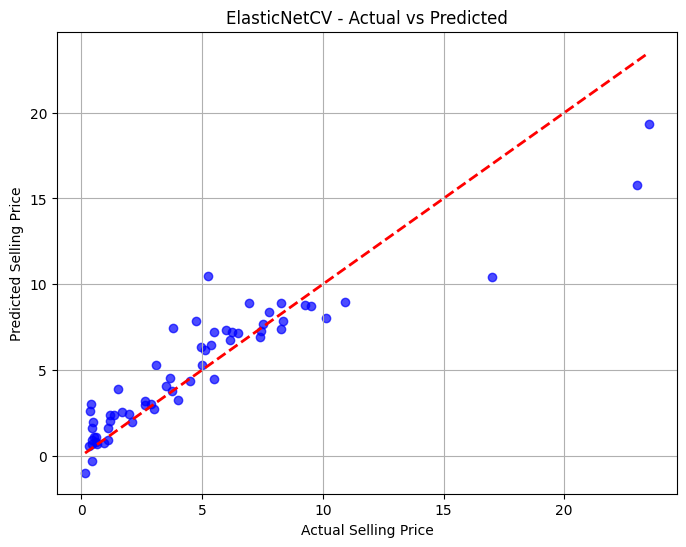

In [17]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_cv_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("ElasticNetCV - Actual vs Predicted")
plt.grid(True)
plt.show()


The predicted values follow the actual values closely and hug the diagonal line, which means your model is well calibrated.

# **Step 6: Save the Trained ElasticNetCV Model**

In [18]:
import joblib

# Save the pipeline
joblib.dump(elastic_cv_pipeline, "ElasticNetReg_CarResalePrice_cv_model.pkl")

print("Model saved as 'ElasticNetReg_CarResalePrice_cv_model.pkl'")


Model saved as 'ElasticNetReg_CarResalePrice_cv_model.pkl'
